In [ ]:
import json
with open("test.json", 'w') as f:
    json.dump({'a':1,'runs':[]},f)

with open("test.json", 'r+') as f:
    run_group_log = json.load(f)
    run_group_log['runs'].append(
        {
            'run_number': 1,
            'finish_time': 'abc',
            'start_time': 'def',
            'temperatures': 123
        }
    )
    f.seek(0) # 
    json.dump(run_group_log, f, indent=4)
    f.truncate()

with open("test.json", 'r+') as f:
    run_group_log = json.load(f)
    run_group_log['runs'].append(
        {
            'run_number': 1,
            'finish_time': 'abc',
            'start_time': 'def',
            'temperatures': 123
        }
    )
    f.seek(0) # 
    json.dump(run_group_log, f, indent=4)

In [10]:
import processing.process_binaries as pb
from pathlib import Path
from importlib import reload

In [23]:
reload(pb)
from config import TBConfig
import tomli
with open('../test_beam.toml', 'rb') as f:
    data = tomli.load(f)
tb_config = TBConfig.model_validate(data)

etroc_binaries = tb_config.telescope_config.etroc_binary_data_directory
scope_binaries = tb_config.oscilloscope.binary_data_directory

trace_file = lambda chnl, run: scope_binaries/Path(f'C{chnl}--Trace{run}.trc')
etroc_file = lambda run: etroc_binaries/Path(f"output_run_{run}_rb0.dat")

run = 112115
output_run_path = tb_config.file_processing.merged_data_directory / Path(f"run_{run}.root")
pb.consolidate_acquisition(
    output_run_path,
    etroc_binary_paths=[etroc_file(run)],
    mcp_binary_path=trace_file(2, run),
    clock_binary_path=trace_file(3, run)
)

no etroc data


In [24]:
import uproot
output = uproot.open(output_run_path)["pulse"].arrays()

output.type.show()

5000 * {
    event: int64,
    l1counter: int64,
    nrow: int32,
    row: var * float64,
    ncol: int32,
    col: var * float64,
    ntot_code: int32,
    tot_code: var * float64,
    ntoa_code: int32,
    toa_code: var * float64,
    ncal_code: int32,
    cal_code: var * float64,
    nelink: int32,
    elink: var * float64,
    nchipid: int32,
    chipid: var * float64,
    bcid: int64,
    nnhits: int32,
    nhits: var * int64,
    mcp_volts: 1298 * float32,
    mcp_seconds: 1298 * float64,
    clock_volts: 1298 * float32,
    clock_seconds: 1298 * float64
}


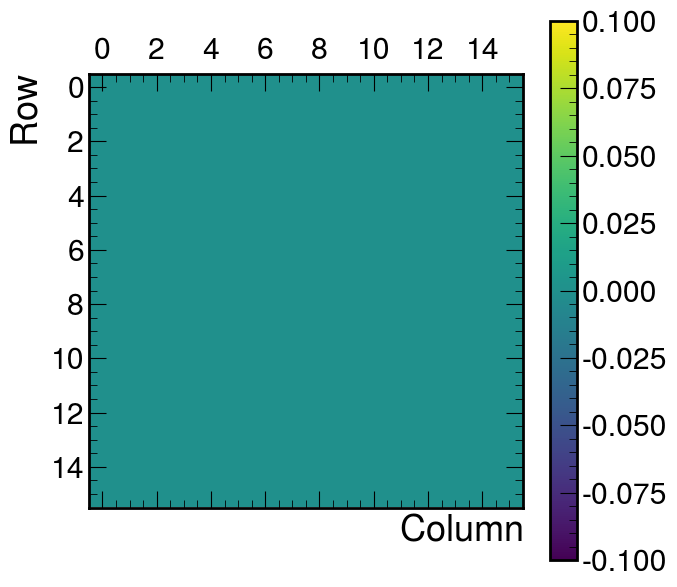

In [25]:
# hit map
# make some plots
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
import awkward as ak
plt.style.use(hep.style.CMS)

hit_matrix = np.zeros((16,16))
for row in range(16):
    for col in range(16):
        pix_sel = (output.row==row)&(output.col==col)
        hit_matrix[row][col] += len(ak.flatten(output.row[pix_sel]))
fig, ax = plt.subplots(1,1,figsize=(7,7))
cax = ax.matshow(hit_matrix)
ax.set_ylabel(r'$Row$')
ax.set_xlabel(r'$Column$')
fig.colorbar(cax,ax=ax)



In [ ]:
# mcp traces on top of one another
 


In [ ]:
# clock histogram